<a href="https://www.kaggle.com/code/rebeccapringle/prediction-of-wild-blueberry-yield-s3e14?scriptVersionId=129929408" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

dftrain = pd.read_csv('/kaggle/input/playground-series-s3e14/train.csv')
dftest = pd.read_csv('/kaggle/input/playground-series-s3e14/test.csv')
dfsub = pd.read_csv('/kaggle/input/playground-series-s3e14/sample_submission.csv')

In [2]:
dftrain.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [3]:
dftest.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,15289,25.0,0.25,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.399367,0.408088,31.394569
1,15290,12.5,0.25,0.25,0.75,0.63,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.488048,0.442866,36.846956
2,15291,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.583379,0.487057,40.037644
3,15292,25.0,0.50,0.38,0.38,0.63,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.433014,0.422847,33.116091
4,15293,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,24.0,0.39,0.360996,0.388860,29.558019


In [4]:
dfsub.head()

,id,yield
0,15289,6025.194
1,15290,6025.194
2,15291,6025.194
3,15292,6025.194
4,15293,6025.194


In [5]:
dftrain = dftrain.drop('id',axis=1)
ids = dftest['id']
dftest = dftest.drop('id',axis=1)

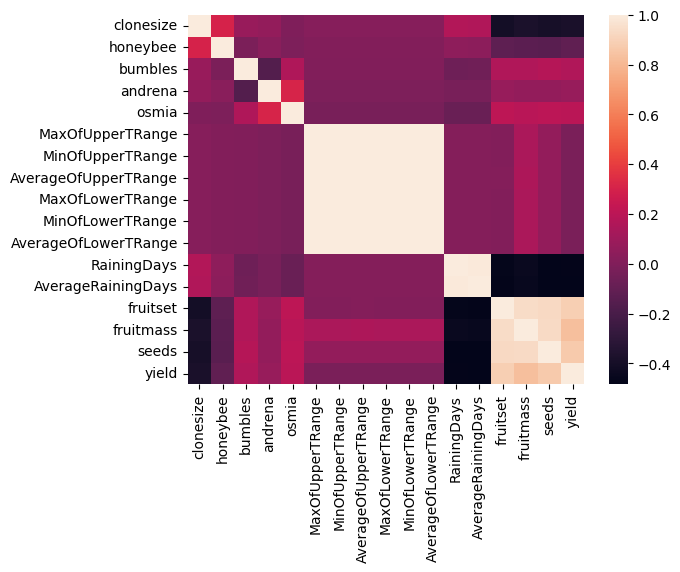

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = dftrain.corr()
sns.heatmap(corr_matrix)
plt.show()

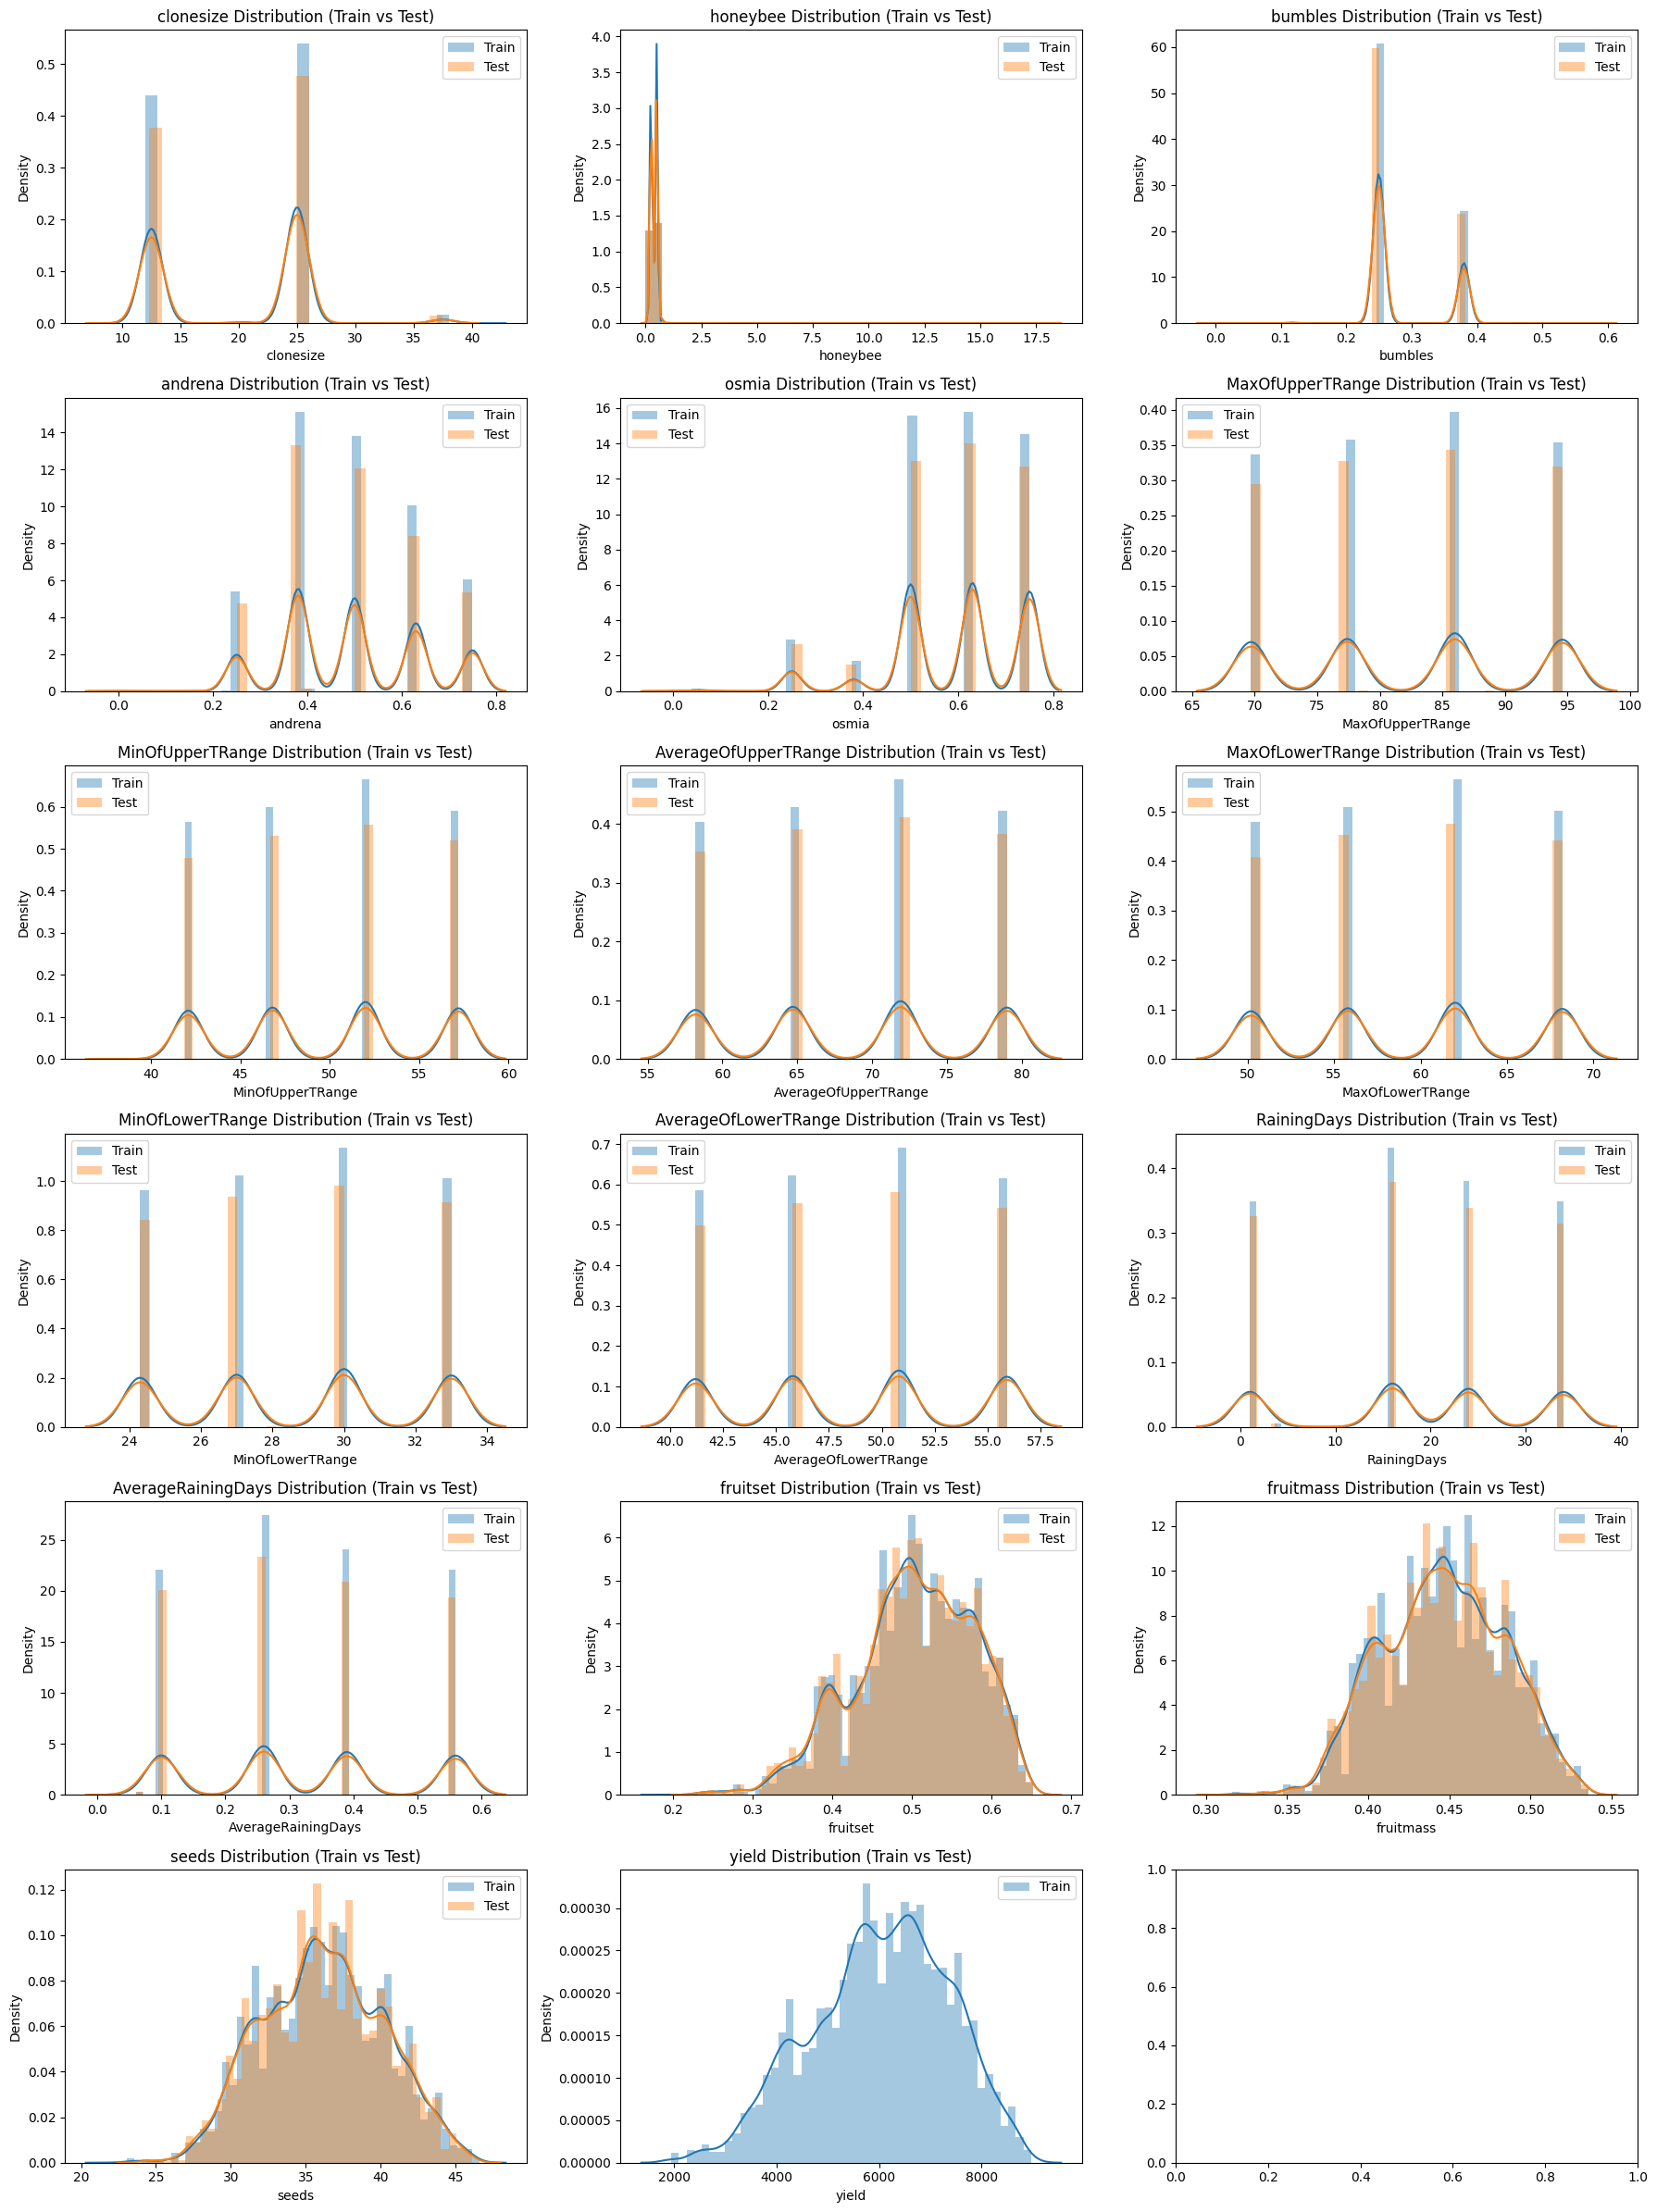

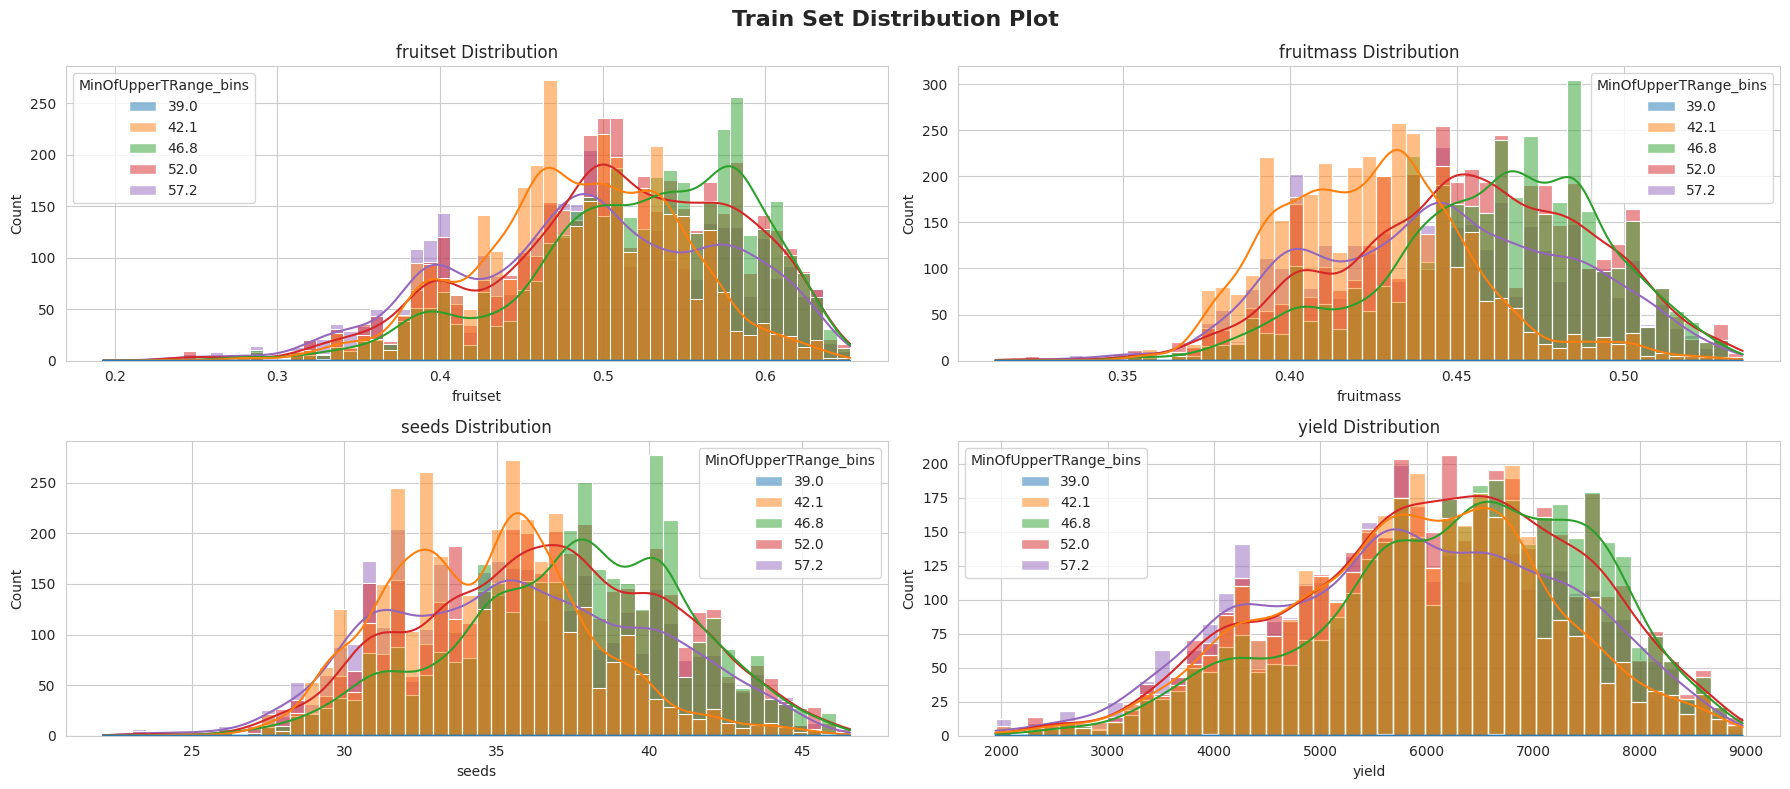

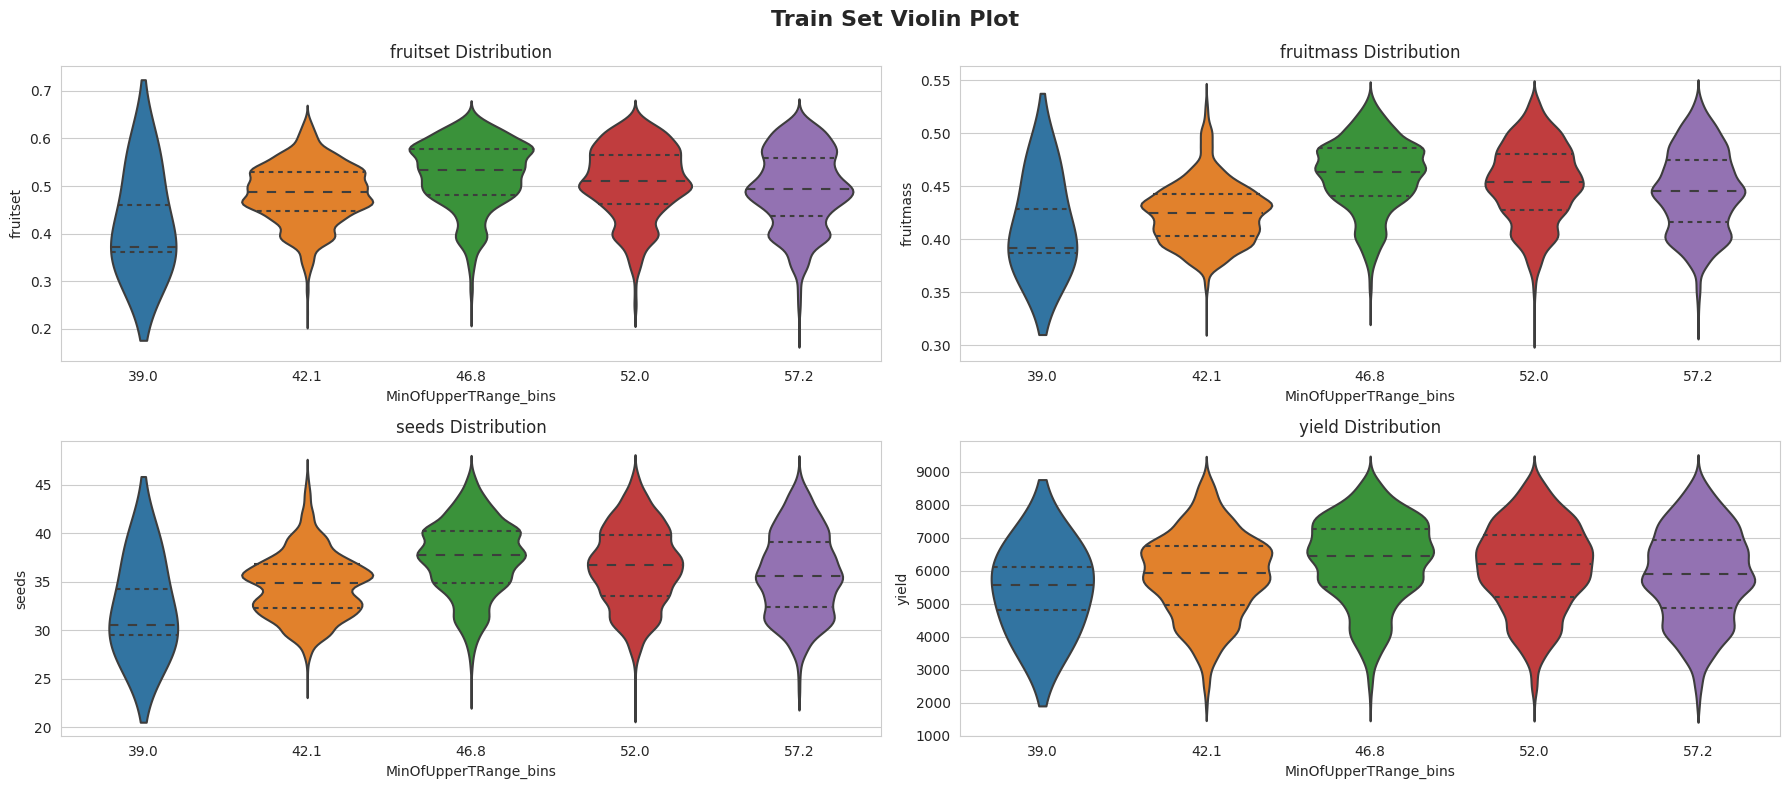

In [7]:
# code from https://www.kaggle.com/code/tetsutani/ps3e14-eda-various-models-ensemble-baseline
def plot_histograms(df_train, df_test,target_col, n_cols=3):
    n_cols = 3
    n_rows = (len(df_train.columns) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))
    axes = axes.flatten()

    for i, var_name in enumerate(df_train.columns.tolist()):
        if var_name != 'is_generated':
            ax = axes[i]
            sns.distplot(df_train[var_name], kde=True, ax=ax, label='Train')
            if var_name != target_col:
                sns.distplot(df_test[var_name], kde=True, ax=ax, label='Test')
            ax.set_title(f'{var_name} Distribution (Train vs Test)')
            ax.legend()

    plt.tight_layout()
    plt.show()
    
def plot_violinplot(df, hue, title='', drop_cols=[]):
    sns.set_style('whitegrid')

    cols = df.columns.drop([hue] + drop_cols)
    n_cols = 2
    n_rows = (len(cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))

    for i, var_name in enumerate(cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.violinplot(data=df, x=hue, y=var_name, ax=ax, inner='quartile')
        ax.set_title(f'{var_name} Distribution')

    fig.suptitle(f'{title} Violin Plot', fontweight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()
    
def plot_distribution(df, hue, title='', drop_cols=[]):
    sns.set_style('whitegrid')

    cols = df.columns.drop([hue] + drop_cols)
    n_cols = 2
    n_rows = (len(cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))

    for i, var_name in enumerate(cols):
        row = i // n_cols
        col = i % n_cols

        ax = axes[row, col]
        sns.histplot(data=df, x=var_name, kde=True, ax=ax, hue=hue) # sns.distplot(df_train[var_name], kde=True, ax=ax, label='Train')
        ax.set_title(f'{var_name} Distribution')

    fig.suptitle(f'{title} Distribution Plot', fontweight='bold', fontsize=16)
    plt.tight_layout()
    plt.show()


target_col = 'yield'
plot_histograms(dftrain, dftest, target_col, n_cols=3)

bins=[-np.inf, 40, 45, 50, 55, +np.inf]
labels=["39.0", "42.1", "46.8", "52.0", "57.2"]
bins_col = 'MinOfUpperTRange'

dftrain[f'{bins_col}_bins'] = pd.cut(dftrain[bins_col], bins = bins, labels=labels)

plot_distribution(dftrain[['fruitset', 'fruitmass', 'seeds', 'yield']+['MinOfUpperTRange_bins']], hue=f'{bins_col}_bins', title='Train Set', drop_cols=[])

plot_violinplot(dftrain[['fruitset', 'fruitmass', 'seeds', 'yield']+['MinOfUpperTRange_bins']], hue=f'{bins_col}_bins', title='Train Set', drop_cols=[])

In [8]:
X_train = dftrain.drop([f'{target_col}'],axis=1).reset_index(drop=True)
y_train = dftrain[f'{target_col}'].reset_index(drop=True)
X_test = dftest.reset_index(drop=True)

drop_cols = ['MinOfUpperTRange','AverageOfUpperTRange', 'AverageOfLowerTRange', 'MaxOfUpperTRange', 'MaxOfLowerTRange']
X_train.drop(drop_cols + [f'{bins_col}_bins'], axis = 1, inplace = True)
X_test.drop(drop_cols, axis = 1, inplace = True) 

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
#X_train, y_train = make_regression(n_estimators=200, random_state=0, n_jobs=-1)
regr = RandomForestRegressor(n_estimators=200, random_state=0, n_jobs=-1)
regr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=0)

In [10]:
preds = regr.predict(X_test)

In [11]:
sub = dfsub
sub['yield'] = preds.astype(float)
sub.to_csv('submission.csv', index=False)
sub

,id,yield
0,15289,4294.486049
1,15290,6317.088704
2,15291,7205.504603
3,15292,4546.082504
4,15293,4317.657377
...,...,...
10189,25478,5524.084967
10190,25479,5593.866948
10191,25480,6462.913902
10192,25481,4392.636864
